# PySeidon-dvt - Tutorial 1: FVCOM class

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## 1. PySeidon-dvt - FVCOM object initialisation

Similarly to the "Station class", the "FVCOM class" is a numerical-model-based object. 

### 1.1. Package importation

As any other library in *Python*, PySeidon-dvt has to be first imported before to be used. Here we will use an alternative *import* statement compared to the one previoulsy presented:  

In [19]:
from pyseidon_dvt import *

*** Star *** here means *all*. Usually this form of statements would import the entire library. In the case of *PySeidon-dvt*, this statement will import the following object classes: FVCOM, Station, Validation, ADCP, Tidegauge and Drifter. Only the FVCOM class will be tackle in this tutorial. However note should note that the architecture design and functioning between each classes are very similar. 

### 1.2. Object definition

*Python* is by definition an [**object oriented language**](http://www.tutorialspoint.com/python/python_classes_objects.htm)...and so is *matlab*. *PySeidon-dvt* is based on this notion of object, so let us define our first "FVCOM" object.

***Exercise 1: ***
- Unravel FVCOM documentation with Ipython ***shortcuts***

***Answer: ***

In [3]:
FVCOM?

According to the documentation, in order to define a FVCOM object, the only required input is a ***filename**. This string input represents path to a file (e.g. testFvcom=FVCOM('./path_to_FVOM_output_file/filename') and whose file can be a pickle file (i.e. *.p) or a netcdf file (i.e. *.nc). Additionally, either a local file path or a OpenDap url could be used.

Optionally, one can extract spatial and/or temporal data from the designated file by respectively defining ***ax*** and ***tx** keywords.

***ax*** defines a specific spatial region to work with, as such:
  - ax = [minimun longitude, maximun longitude, minimun latitude, maximum latitude]
  - or ax = [pt0long, pt1long, pt2long, pt3long, pt0lat, pt1lat, pt2lat, pt3lat] where pt0, 1, 2, 3 are the counter clockwise corner points around a rectangle
  - or use one of the following pre-defined region: ax = 'GP', 'PP', 'DG' or 'MP'
  
***tx***  defines for a specific temporal period to work with, as such:
  - tx = ['2012-11-07T12:00:00','2012.11.09 12:00:00'], string of 'yyyy-mm-dd hh:mm:ss'
Note that these options permit to extract partial data from the overall file and therefore reduce memory and cpu use.

One should note that throughout the package, the following conventions apply:
  - Date = string of 'yyyy-mm-ddThh:mm:ss'
  - Coordinates = decimal degrees East and North
  - Directions = in degrees, between -180 and 180 deg., i.e. 0=East, 90=North, +/-180=West, -90=South
  - Depth = 0m is the free surface and depth is negative


***Exercise 2: ***
- define a FVCOM object named *fvcomOD* from an **opendap url**
- define a FVCOM object named *fvcomPartial1* from the same opendap url using **ax and tx keywords**
- define a FVCOM object named *fvcomPartial2* from the same opendap url using the **same ax but a consecutive tx period**

***Answer: ***

In [4]:
fvcomOD=FVCOM('http://ecoii.acadiau.ca/thredds/dodsC/ecoii/test/FVCOM3D_dngrid_BF_20130619_20130621.nc')

Retrieving data from /home/grumpynounours/Desktop/test/acadia_BoF_2011-09-02_2011-09-04.nc ...
Initialisation...


In [5]:
ax=[-65.77, -65.75, 44.675, 44.685]
ax2=[-64.4221, -64.4284, -64.4029, -64.3977, 45.3713, 45.3614, 45.3566, 45.3662]
tx1=['2013-06-20 12:00:00', '2013-06-21 12:00:00']
tx2=['2013-06-21 12:00:00', '2013-06-21 18:00:00']
fvcomPartial1=FVCOM('http://ecoii.acadiau.ca/thredds/dodsC/ecoii/test/FVCOM3D_dngrid_BF_20130619_20130621.nc', ax=ax, tx=tx1)
fvcomPartial2=FVCOM('http://ecoii.acadiau.ca/thredds/dodsC/ecoii/test/FVCOM3D_dngrid_BF_20130619_20130621.nc', ax=ax, tx=tx2)
fvcomPartial3=FVCOM('http://ecoii.acadiau.ca/thredds/dodsC/ecoii/test/FVCOM3D_dngrid_BF_20130619_20130621.nc', ax=ax2, tx=tx2)

Retrieving data from /home/grumpynounours/Desktop/test/acadia_BoF_2011-09-02_2011-09-04.nc ...
Initialisation...
Re-indexing may take some time...
-Now working in bounding box-
-Now working in time box-
Retrieving data from /home/grumpynounours/Desktop/test/acadia_BoF_2011-09-02_2011-09-04.nc ...
Initialisation...
Re-indexing may take some time...
-Now working in bounding box-
-Now working in time box-
Retrieving data from /home/grumpynounours/Desktop/test/acadia_BoF_2011-09-02_2011-09-04.nc ...
Initialisation...
Re-indexing may take some time...
-Now working in bounding box-
-Now working in time box-


### 1.3. Object attributes, functions, methods & special methods

The FVCOM object possesses 4 attributes, 4 methods  (or 3 for 2D simulations) and 1 special method. They would appear by typing ***fvcomOD. Tab*** for instance.

An *attribute* is a quantity intrinsic to its *object*. A *method* is an intrinsic *function* which changes an *attribute* of its object. Contrarily a *function* will generate its own *output*:

The FVCOM attributes are:
- ***History***: history metadata that keeps track of the object changes
- ***Data***: gathers the raw/unchanged data of the specified *.nc file
- ***Grid***: gathers the grid related data
- ***Variables***: gathers the hydrodynamics related data. Note that methods will generate new fields in this attribute

The FVCOM methods & functions are:
- ***Util2D***: gathers utility methods and functions for use with 2D and 3D variables
- ***Util3D***: gathers utility methods and functions for use only with 3D variables. Note that this attribut will not appear for 2D simulations.
- ***Plots***: gathers plotting methods for use with 2D and 3D variables
- ***Save_as***: save loally the current object and its attributs in a pickle file or a matlab file. Note that the so created pickle file can be use later on to define a FVCOM object and therefore restart your work where you left it...yet be careful what you wish for!!! Be aware that FVCOM runs can be very large in terms of memory when you decide to save anything from OpenDap. 

The special FVCOM method permits to ***stack*** two FVCOM objects (e.g. fvcom1 and fvcom2) through a simple addition, as such: 

However, fvcom1 and fvcom2 must share the exact same spatial domain and be consecutive in time (e.g. fvcom1 before in time compared to fvcom2).

***Exercise 3: ***
- check *fvcomPartial1*'s **History** attribute
- ***stack*** *fvcomPartial2* to *fvcomPartial1*
- check *fvcomPartial1*'s **History** attribute
- ***save*** *fvcomPartial1* on your machine

***Answer: ***

In [6]:
fvcomPartial1.History

['Created from /home/grumpynounours/Desktop/test/acadia_BoF_2011-09-02_2011-09-04.nc',
 'Bounding box =[-65.77, -65.75, 44.675, 44.685]',
 'Temporal domain from 2011-09-02 12:00:00 to 2011-09-02 18:00:00']

In [7]:
fvcomPartial1 += fvcomPartial2

In [8]:
fvcomPartial1.History

['Created from /home/grumpynounours/Desktop/test/acadia_BoF_2011-09-02_2011-09-04.nc',
 'Bounding box =[-65.77, -65.75, 44.675, 44.685]',
 'Temporal domain from 2011-09-02 12:00:00 to 2011-09-02 18:00:00',
 'Data from acadia_BoF_2011-09-02_2011-09-04.nc has been stacked']

Note how the ***History*** attribute has changed

## 2. PySeidon-dvt - Hands-on (30 mins)

***Exercise 4: ***
- Plot ***colormap*** of *fvcomPartial1*'s bathymetry
- Plot ***colormap*** of *fvcomOD*'s bathymetry

***Answer: ***

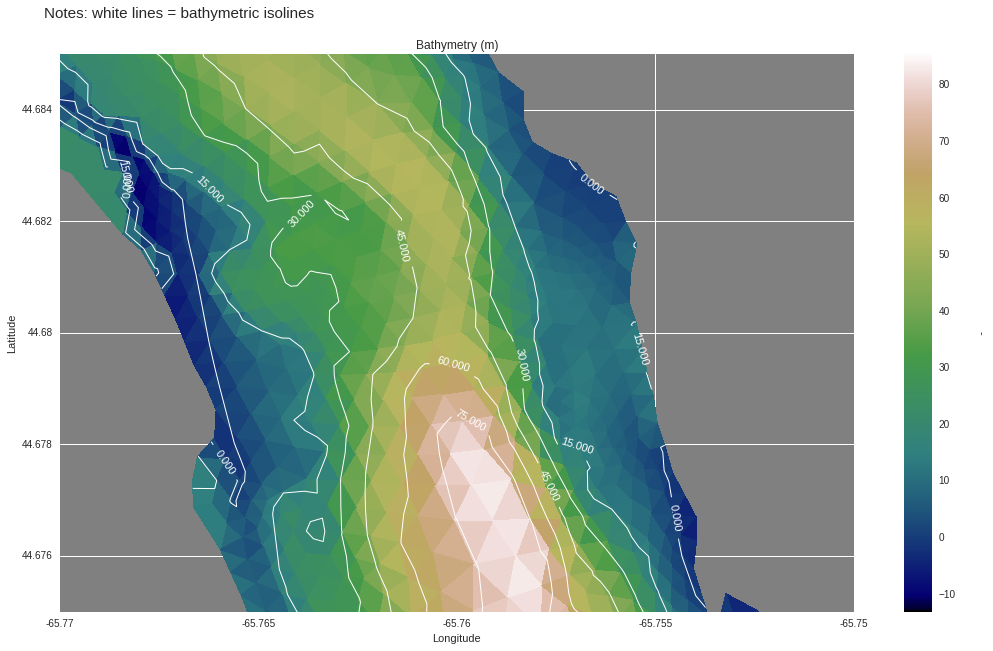

In [20]:
fvcomPartial1.Plots.colormap_var(fvcomPartial1.Grid.h, title='Bathymetry (m)', mesh=False)

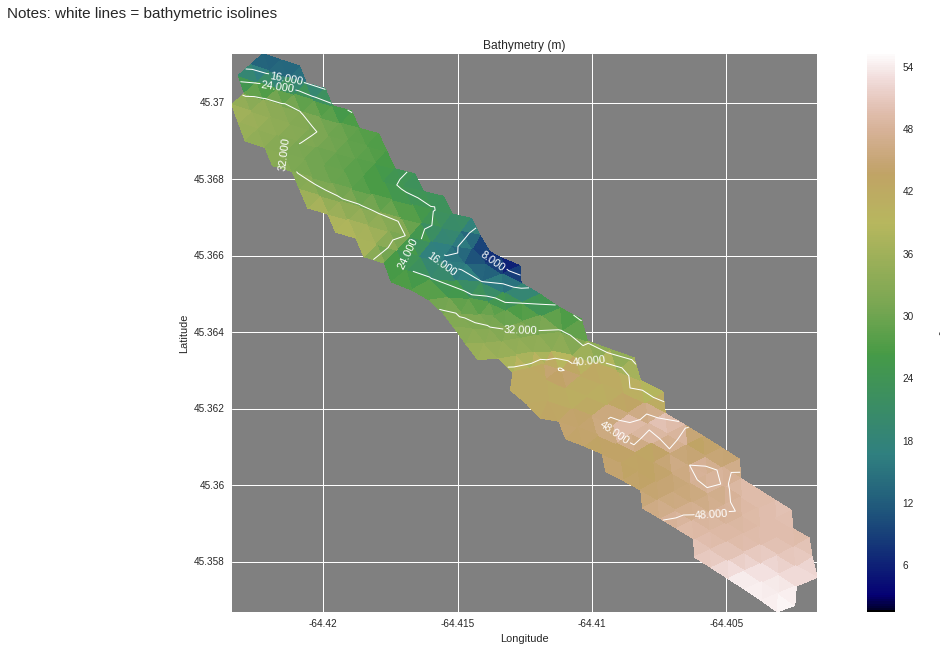

In [10]:
fvcomPartial3.Plots.colormap_var(fvcomPartial3.Grid.h, title='Bathymetry (m)', mesh=False)

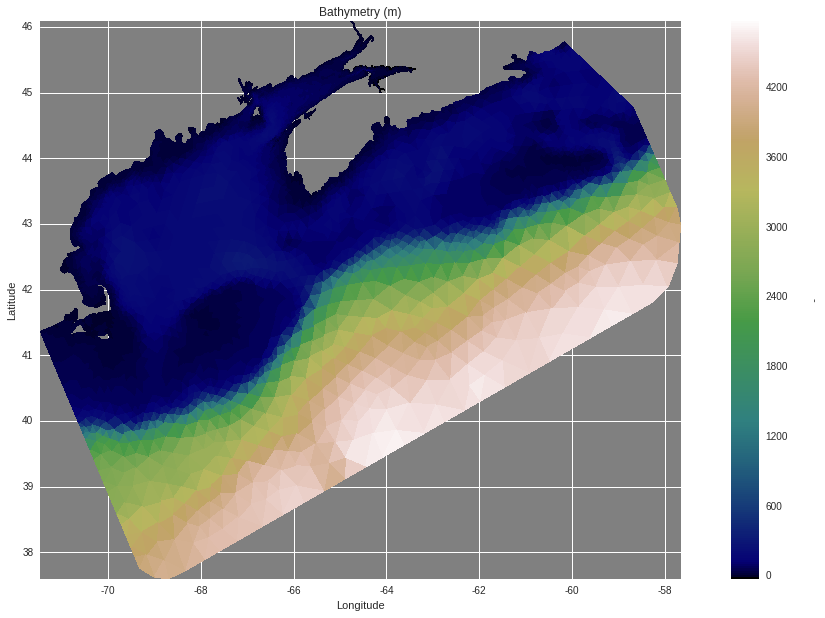

In [11]:
fvcomOD.Plots.colormap_var(fvcomOD.Grid.h, title='Bathymetry (m)', isoline='none')

***Exercise 5: ***
- compute the 3D ***velocity norm*** for the entire *fvcomPartial1*
- compute the time indices ***ebb*** and ***flood*** for refPoint=[-65.761, 44.68]
- use ***np.mean*** to compute the time-averaged  3D velocity norm for ***ebb*** indices, *ebbNorm*
- use ***np.mean*** to compute the time-averaged  3D velocity norm for ***flood*** indices, *floodNorm*
- plot a ***vertical slice ***of *ebbNorm* between pointD=[-65.76246, 44.67976] and pointB=[-65.76053, 44.68023]
- plot a ***vertical slice ***of *floodNorm* between pointA=[-65.76178, 44.68057] and pointC=[-65.76123, 44.67942]
- check *fvcomPartial1*'s ***History*** attribute

***Answer: ***

-Velocity norm added to FVCOM.Variables.-


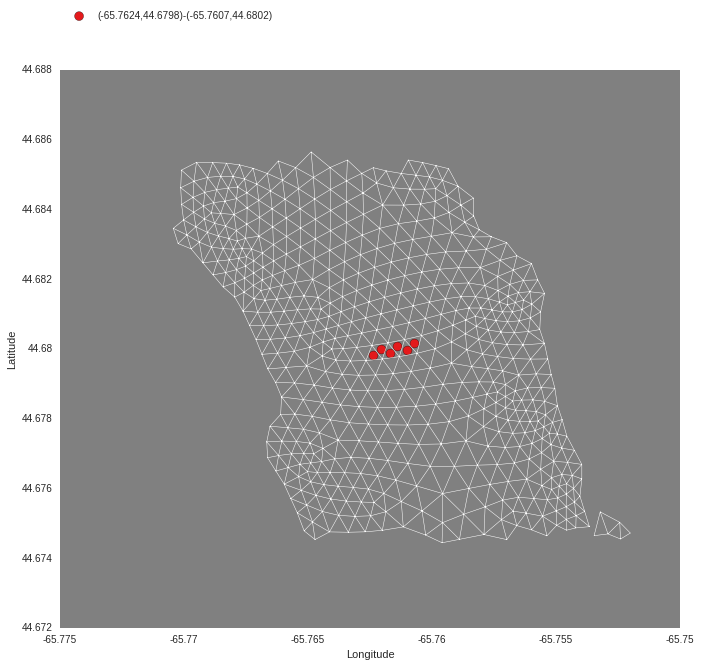

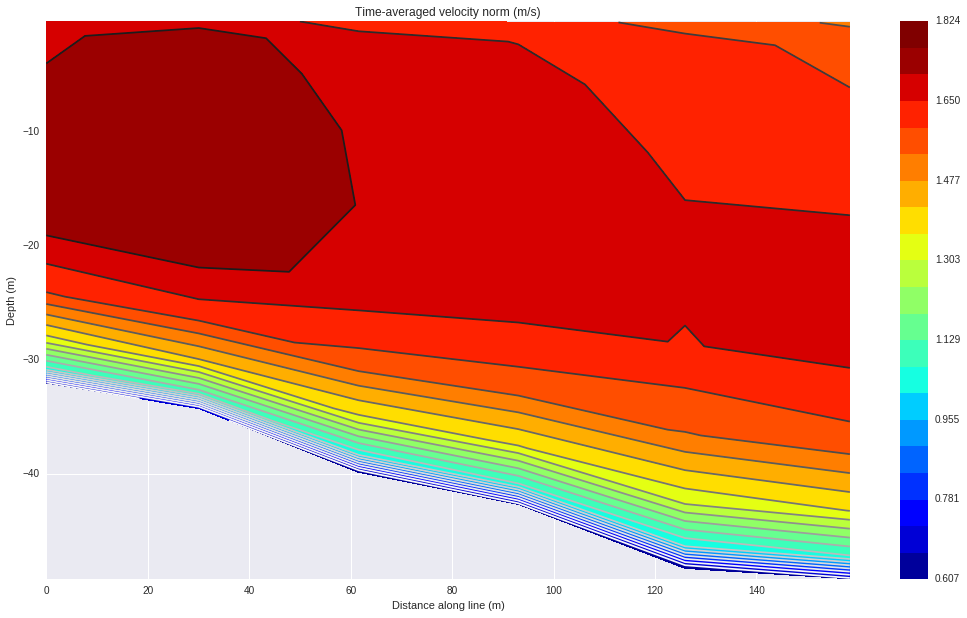

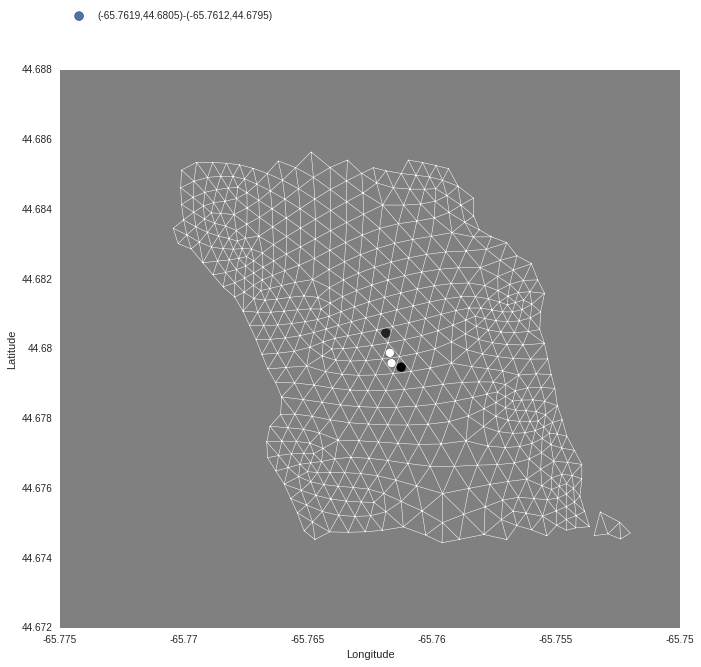

['Created from /home/grumpynounours/Desktop/test/acadia_BoF_2011-09-02_2011-09-04.nc',
 'Bounding box =[-65.77, -65.75, 44.675, 44.685]',
 'Temporal domain from 2011-09-02 12:00:00 to 2011-09-02 18:00:00',
 'Data from acadia_BoF_2011-09-02_2011-09-04.nc has been stacked',
 'Velocity norm computed']

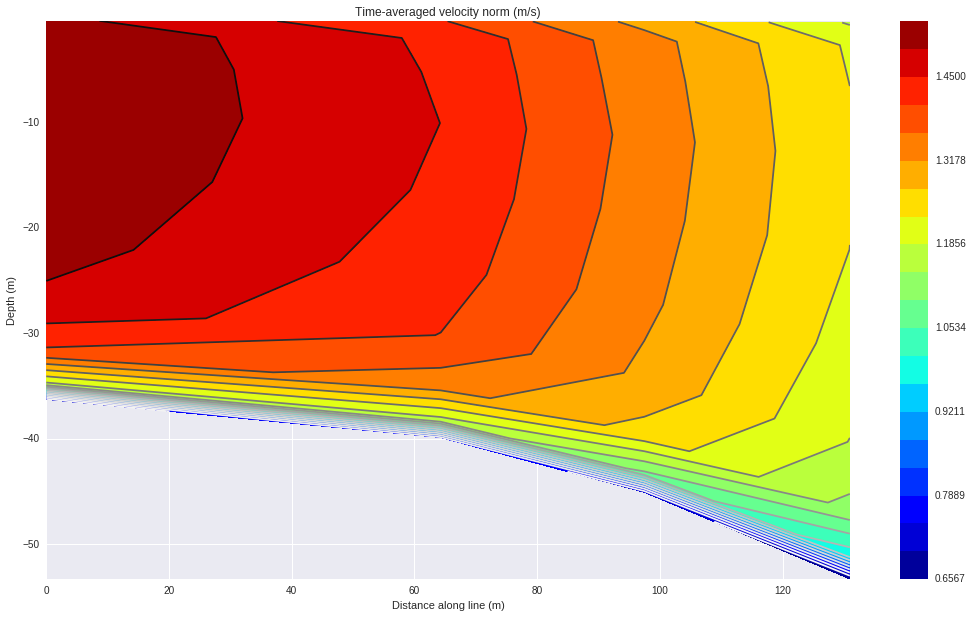

In [12]:
refPoint=[-65.761, 44.68]
pointA=[-65.76178, 44.68057]
pointB=[-65.76053, 44.68023]
pointC=[-65.76123, 44.67942]
pointD=[-65.76246, 44.67976]

fI, eI, pa, pav= fvcomPartial1.Util2D.ebb_flood_split_at_point(refPoint[0], refPoint[1])
fvcomPartial1.Util3D.velo_norm()
ebbNorm = np.mean(fvcomPartial1.Variables.velo_norm[eI,:,:], 0)
floodNorm = np.mean(fvcomPartial1.Variables.velo_norm[fI,:,:], 0)
fvcomPartial1.Plots.vertical_slice(ebbNorm, pointD, pointB, title='Time-averaged velocity norm (m/s)')
fvcomPartial1.Plots.vertical_slice(floodNorm, pointA, pointC, title='Time-averaged velocity norm (m/s)')
fvcomPartial1.History

***Exercise 6: ***
- Using *fvcomOD*
- Plot the *vertical shear profile* averaged over ebb indices for a point of your own choice
- Plot rose diagram and exceedance curve for the same point with *flow dir at point*
- Plot flow velocity histogram for the same point with *speed_histogram*
- Plot a *colormap* of the bathymetry, *add a point* at the location of your point

***Answer: ***

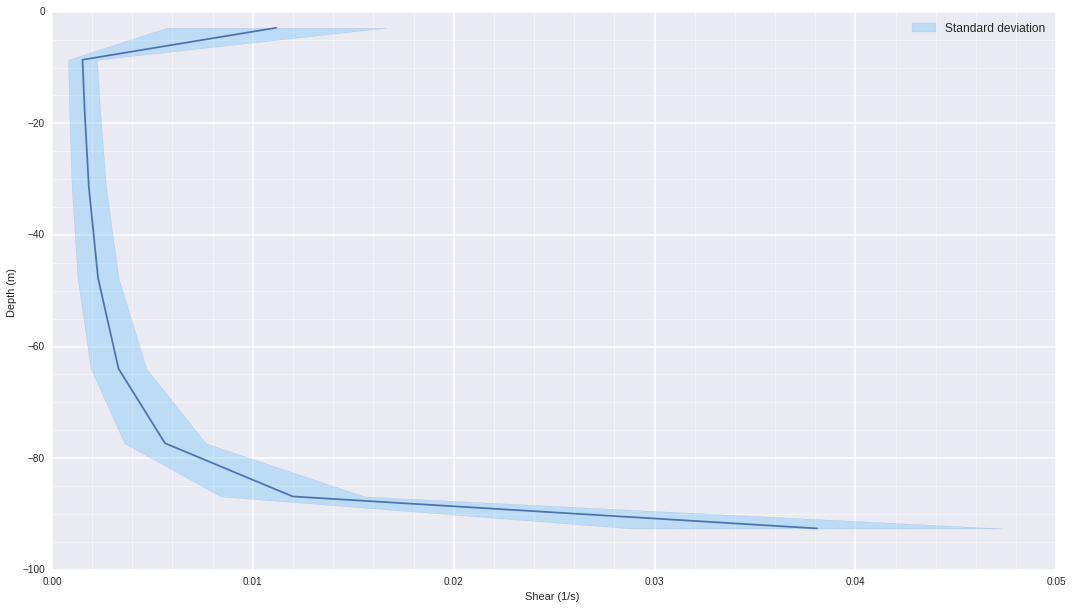

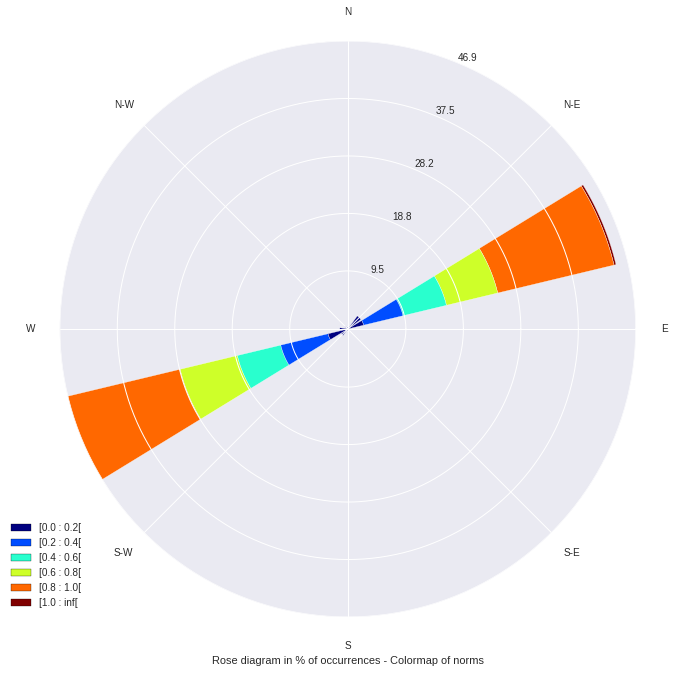

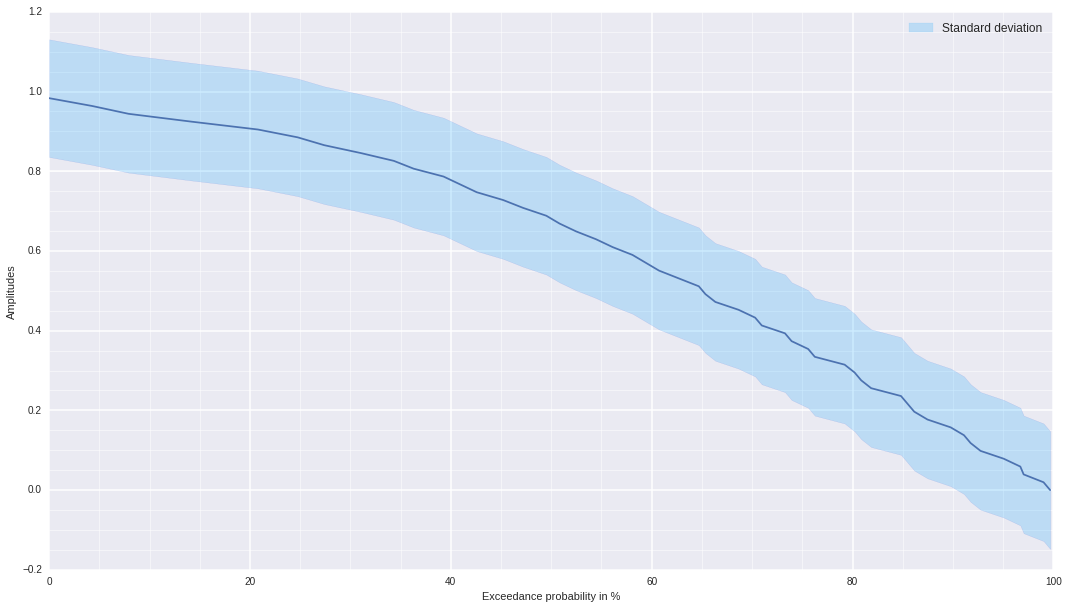

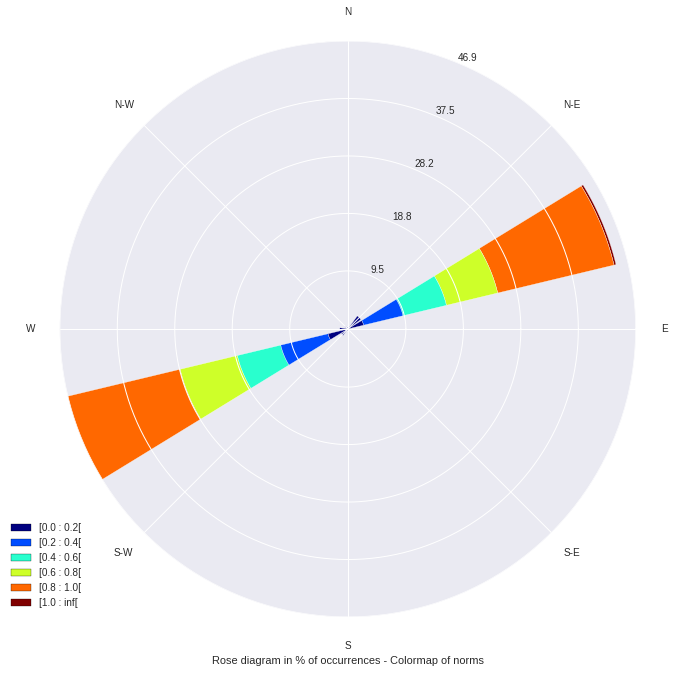

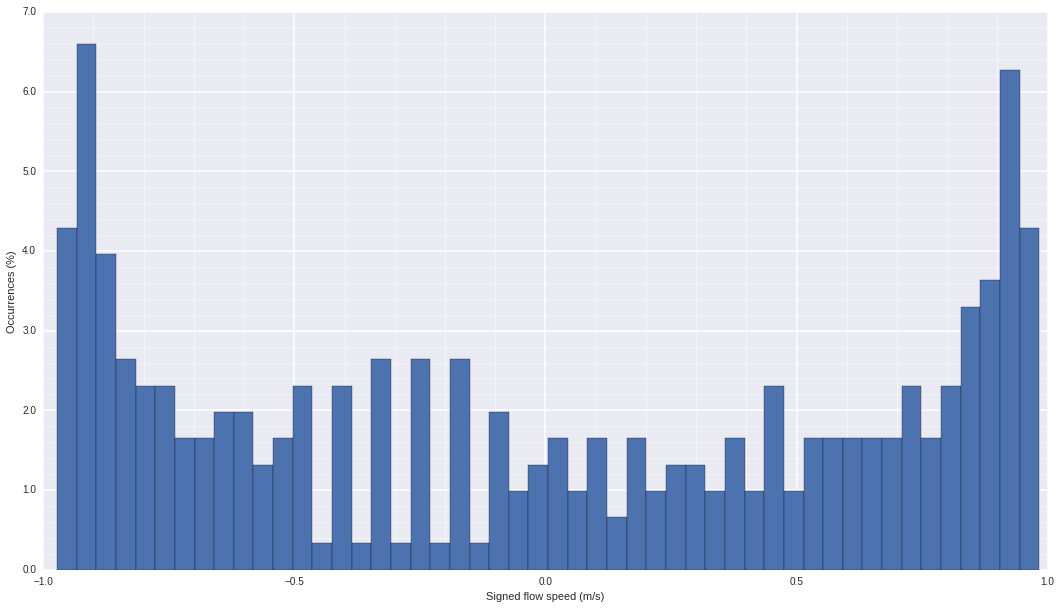

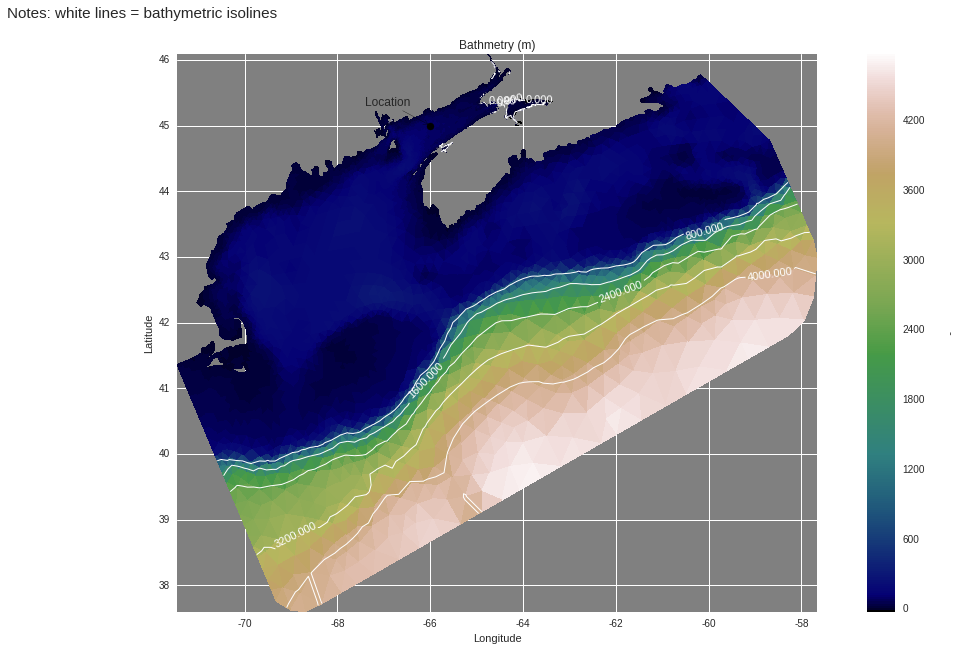

In [13]:
point = [-66.0, 45.0] #refPoint
fI, eI, pa, pav= fvcomOD.Util2D.ebb_flood_split_at_point(point[0], point[1])
vp = fvcomOD.Util3D.verti_shear_at_point(point[0], point[1], time_ind=eI, graph=True)
fD, norm = fvcomOD.Util2D.flow_dir_at_point(point[0], point[1], exceedance=True)
fvcomOD.Util2D.speed_histogram(point[0], point[1])
fvcomOD.Plots.colormap_var(fvcomOD.Grid.h, title='Bathmetry (m)', mesh=False)
fvcomOD.Plots.add_points(point[0], point[1], label='Location')

## 3. PySeidon-dvt - Overview of the 2D functionality (30 mins)

PySeidon-dvt's 2D functionality is gathered in Util2D and composed of 12 functions:
- bidirectionality_at_point
- degree2metric_coordinates
- Util2D.depth_at_point
- ebb_flood_split_at_point
- exceedance
- flow_dir_at_point
- Harmonic_analysis_at_point
- Harmonic_reconstruction
- index_finder
- interpolation_at_point
- speed_histogram
- vorticity_over_period

and 7 methods:
- depth
- depth_averaged_power_assessment
- depth_averaged_power_density
- flow_dir
- hori_velo_norm
- slope
- vorticity


***Exercise 7: ***
- With one of the FVCOM objects, use '?' to unravel the documentation of each function as shown in 1.2.
- Try them out accordingly to the documentation
***Example***

In [14]:
fvcomOD.Util2D.degree2metric_coordinates?

In [15]:
x, y = fvcomOD.Util2D.degree2metric_coordinates(pointA[0], pointA[1])
print x, y

-95425.7547239 315615.675451


***Exercise 8: ***
- With one of the FVCOM objects, use '?' to unravel the documentation of each method
- Try them out accordingly to the documentation
- Check that a new field has been created in FVCOM.Varaibles

In [16]:
fvcomPartial1.Util2D.depth?

In [18]:
fvcomPartial1.Util2D.depth()
fvcomPartial1.Grid.depth2D.shape

-Depth 2D added to FVCOM.Variables.-


(110, 982)

## 4. PySeidon-dvt - Overview of the 3D functionality (30 mins)

PySeidon-dvt's 2D functionality is gathered in Util2D and composed of 9 functions:
- depth_at_point
- flow_dir_at_point
- index_finder
- interp_at_depth
- interpolation_at_point
- power_assessment_at_depth
- velo_norm_at_point
- verti_shear_at_point
- vorticity_over_period

and 6 methods:
- depth
- power_density
- flow_dir
- velo_norm
- verti_shear
- vorticity


***Exercise 9: ***
- Similarly to the two previous exercises, with one of the FVCOM objects, use '?' to unravel the documentation of each function and method
- Try them out accordingly to the documentation
- In the case of methods check that a new field has been created in FVCOM.Variables

## 5. PySeidon-dvt - to infinity and beyond (30 mins) 

*PySeidon-dvt* can easily be coupled to any other *Python* library and package. For instance, the following script creates a series of *.png which could be then easily turn into an animated GIF with [GIMP](http://www.gimp.org/):


In [ ]:
fvcomPartial1.Util2D.hori_velo_norm()
import matplotlib.pyplot as plt
for i in range(fvcomPartial1.Grid.ntime):
    fvcomPartial1.Plots.colormap_var(fvcomPartial1.Variables.hori_velo_norm[i,:], title='Flow speed (m/s)')
    saveName = 'anim{0}.png'.format(i)
    plt.savefig(saveName, bbox_inches=0)
    plt.close()

## 6. PySeidon-dvt - Bug patrol & steering committee

### 6.1. Bug report

As beta tester, your first assignement is to report bugs...yet not everything is a bug. The first thing to check before to report a bug is to verify that your version of *PySeidon-dvt* is up-to-date. The best way to keep up with the package evolution is to [***git***](http://git-scm.com/) to ***clone*** the repository, use ***pull*** to update it and ***re-install*** it if needed. 

The second thing to check before to report a bug is to verify that the bug is ***reproducible***. When running into a bug, double check that your inputs fit the description of the documentation then turn the ***debug flag on*** (e.g. *output = fvcomobject.function(inputs, debug=True)*) and submit the command again. If the error re-occurs then report it (i.e. copy entire error message + command and send it to package administrator)

### 6.2. Suggestions & critics

Your second role as beta-tester is to submit suggestions and critics to the developpers regarding the functioning and functionality of the package. Beta testing phase is the best opportunity to steer a project towards the applications you would like to be tackled...